# Intro to Natural Language Processing (NLP)

The Natural Language Processing (NLP) field is incredibly vast, and it has applications in virtually every aspect of data science. In this notebook, we will walk through a **very brief** survey of NLP, and provide some instruction on a couple handy tools along the way.

NLP tools span a wide range of implementations, and it is not uncommon for NLP packages to have conflicts with other Python libraries. So, to keep everything compatible in one place, it is recommended that you create a new pip environment for NLP projects. To set up an NLP pip environment for this lab, follow the steps in the "Pip Environment" section of the [Python Environment Setup page in Canvas](https://iu.instructure.com/courses/2181786/pages/week-1-%7C-python-environment-setup?module_item_id=30340853), and **use the *environment.yml* file provided in this folder.** This should install the packages you'll need for this lab.

Next, **[download a spaCy NLP model](https://spacy.io/models)** based on your preferences (in the NLP environment) so you can use the spaCy library installed in the environment.

*Optionally, if you prefer to use a different environment, install the following packages separately using pip: [Scikit-Learn](https://scikit-learn.org/stable/install.html#installing-the-latest-release), [spaCy](https://spacy.io/usage), [ScatterText](https://github.com/JasonKessler/scattertext#installation), [CorEx](https://ryanjgallagher.github.io/code/corex/example), and [vaderSentiment](https://github.com/cjhutto/vaderSentiment#installation).*

## Preprocessing

To illustrate preprocessing text data, we'll use the [spaCy](https://spacy.io/) package.

*spaCy is capable of **much** more than what we will use it for in this lab. More advanced implementations of spaCy may require knowledge outside the scope of this course.*

In [2]:
import pandas as pd
import spacy
from spacy import displacy
print(spacy.__version__)

3.7.4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

### Tokenizing

The very first part of dealing with text data is to collect each **term** or unitary element of text (e.g., words, punctuation, etc.) in the form of "tokens".

In [6]:
# depends on your choice of spaCy model
nlp = spacy.load('en_core_web_sm')

In [7]:
intro = '''The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)

In [8]:
print([t.text for t in doc])

['The', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', 'field', 'is', 'incredibly', 'vast', ',', '\n', 'and', 'it', 'has', 'applications', 'in', 'virtually', 'every', 'aspect', 'of', 'data', 'science', '.', '\n', 'In', 'this', 'notebook', ',', 'we', 'will', 'walk', 'through', 'a', '*', '*', 'very', 'brief', '*', '*', 'survey', 'of', 'NLP', ',', '\n', 'and', 'provide', 'some', 'instruction', 'on', 'a', 'couple', 'handy', 'tools', 'along', 'the', 'way', '.', '\n']


In [9]:
for i, sentence in enumerate(doc.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.

sentence 2

 In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.



In [10]:
df_intro = []

for token in doc:
    df_intro.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])

In [11]:
df_intro = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=df_intro)

In [12]:
df_intro.sample(5)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
3,Processing,Processing,PROPN,NNP,nmod,Xxxxx,True,False
23,science,science,NOUN,NN,pobj,xxxx,True,False
14,it,it,PRON,PRP,nsubj,xx,True,True
19,every,every,PRON,DT,nummod,xxxx,True,True
41,survey,survey,NOUN,NN,pobj,xxxx,True,False


What is a **stop word**?

In [13]:
df_intro[df_intro['is_stop']].sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
42,of,of,ADP,IN,prep,xx,True,True
17,in,in,ADP,IN,prep,xx,True,True
33,through,through,ADP,IN,prep,xxxx,True,True
8,is,be,AUX,VBZ,ROOT,xx,True,True
15,has,have,VERB,VBZ,conj,xxx,True,True
37,very,very,ADV,RB,advmod,xxxx,True,True
56,the,the,DET,DT,det,xxx,True,True
14,it,it,PRON,PRP,nsubj,xx,True,True
30,we,we,PRON,PRP,nsubj,xx,True,True
21,of,of,ADP,IN,prep,xx,True,True


spaCy defines **lemmas** to be *"the base forms of words. For example, the lemma of `was` is `be`, and the lemma of `rats` is `rat`."*

In [14]:
t = nlp('running')[0]
t.lemma_

'run'

**Sentence Dependencies**

We can visualize some of these attributes (like the sentence dependencies) using [displacy](https://spacy.io/usage/visualizers).

In [15]:
doc = nlp('We can visualize these using displacy.')

In [16]:
displacy.render(doc, style='dep', options={'distance': 120})

Note: this isn't always going to be *exactly* accurate, but it's very good and still useful.

### Named Entity Recognition

Some words are **Named Entities**: locations like "Alaska", dates like "January 1st", companies like "Google", etc. spaCy can tag these using [Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities).

In [17]:
doc = nlp('... locations like "Alaska", dates like "January 1st", companies like "Google", etc.')

In [18]:
displacy.render(doc, style='ent')

### Multiple Documents

*NLP Terms: A **document** is a collection of **tokens**, and a **corpus** is a collection of documents.*

When spaCy processes text, it runs it through a [pipeline](https://spacy.io/usage/processing-pipelines) of different models to store token attributes for each token. This is how we get the functionality above. Though, when we are tokenizing multiple documents, we might not need all of these [built-in components](https://spacy.io/usage/processing-pipelines#built-in). For example, we might just need enough to filter our text based on the analysis done.

For example, suppose we've determined that we want to the remove the following tokens from a dataset of [coffee reviews](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/) (descriptions):

- stop words (except the lemma "not", to maintain the idea of object negation)
- punctuation
- numbers

In this case, we don't need NER, Dependency Labels, or Document Labels. Removing these processes from the spaCy pipeline will save us some time.

In [19]:
df_coffee = pd.read_csv('./data/coffee_analysis.csv')

In [20]:
df_coffee.drop_duplicates(subset='desc_1', inplace=True)

In [21]:
df_coffee.shape

(2092, 12)

In [22]:
print(df_coffee['desc_1'].sample().iloc[0])

Tart-leaning, fruity-sweet. Raspberry, cocoa powder, nasturtium, fir, lemon drop in aroma and cup. Bittersweet structure with tart acidity; full, syrupy mouthfeel. Gently drying, wood-framed finish with raspberry undertones.


In [23]:
# nlp.pipe returns a generator
docs = nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat'])

# save the spaCy objects into the DataFrame
df_coffee['spacy_doc'] = list(docs)

In [24]:
def tokenizer(doc, join_tokens=False):
    '''
    Tokenize a single spaCy `doc`.

    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''

    # collect lemmas that meet the following criteria:
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]

    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens

In [29]:
df_coffee['docs_clean'] = df_coffee['spacy_doc'].apply(tokenizer)

In [30]:
df_coffee[['desc_1', 'spacy_doc', 'docs_clean']].head()

,desc_1,spacy_doc,docs_clean
0,"Evaluated as espresso. Sweet-toned, deeply ric...","(Evaluated, as, espresso, ., Sweet, -, toned, ...","[evaluate, espresso, sweet, tone, deeply, rich..."
1,"Evaluated as espresso. Sweetly tart, floral-to...","(Evaluated, as, espresso, ., Sweetly, tart, ,,...","[evaluate, espresso, sweetly, tart, floral, to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...","(Crisply, sweet, ,, cocoa, -, toned, ., Lemon,...","[crisply, sweet, cocoa, tone, lemon, blossom, ..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...","(Delicate, ,, sweetly, spice, -, toned, ., Pin...","[delicate, sweetly, spice, tone, pink, pepperc..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...","(Deeply, sweet, ,, subtly, pungent, ., Honey, ...","[deeply, sweet, subtly, pungent, honey, pear, ..."


In [31]:
print(df_coffee['desc_1'].iloc[5])

Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus).


In [32]:
print(df_coffee['docs_clean'].iloc[5])

['delicate', 'richly', 'sweetly', 'tart', 'dry', 'hibiscus', 'fine', 'musk', 'almond', 'sandalwood', 'raspberry', 'aroma', 'cup', 'fruit', 'tone', 'deeply', 'sweet', 'structure', 'gently', 'express', 'acidity', 'buoyant', 'satiny', 'smooth', 'mouthfeel', 'crisp', 'flavor', 'saturate', 'finish', 'characterize', 'sweet', 'tart', 'fruit', 'floral', 'tone', 'raspberry', 'hibiscus']


## Vectorization

Once we have our tokens selected and "cleaned", we need to convert the textual data into numerical data. **In other words, we need to convert each token (or document) into a *vector* representation.** There are many ways to represent textual information in the form of numerical data, but in this class we will cover Count Vectorization and Term-Frequency Inverse Document Frequency Vectorization; we'll call these **vectorizers**.

### Brief Intro to Scikit-Learn

**[Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit**, and it's modules are used in almost every aspect of data science. Here, we are going to use its [feature extraction module](https://scikit-learn.org/stable/modules/feature_extraction.html), which is built for extracting numerical features from data such as text or images. We will be using it for vectorization of text data, and in these cases, the scikit-learn process is:

1. Preprocess some data (e.g., from text to tokens)
2. Define a model (e.g., a vectorizer)
3. "Fit" that model to the data using `.fit`
4. Transform the data based on the model's parameters using `.transform`
    - We can also combine these last two steps with `.fit_transform`

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

CountVectorizer converts each document into a "Bag of Words". In other words, the document is encoded based on the words it contains, **regardless of the order**. And, each term can be represented based on the documents it is contained in.

In [34]:
corpus_raw = ['This coffee is really really tasty.',
              'Tea smells and tastes better than coffee.',
              "Best smelling coffee I have ever smelled!"]

In [35]:
cv = CountVectorizer(ngram_range=(1, 1),  # capture "pairs", or "n-tuples" of adjacent words
                     max_df=1.0,          # exclude terms in ≥ `max_df` (or %) of docs
                     min_df=1,            # exclude terms in ≤ `min_df` (or %) of docs
                     max_features=None,   # maximum number of terms/ngrams to include
                     binary=False)        # only log 1s and 0s for term presence

X = cv.fit_transform(corpus_raw)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

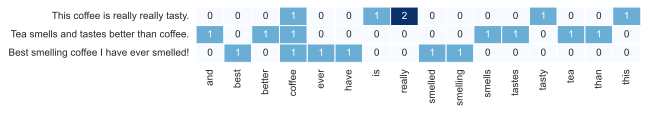

In [36]:
plt.figure(figsize=(8, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

This is called a **document-term matrix**.

- We could use `max_df` to remove the term "coffee" since it occurs in every document. This is one example of extracting *informative* features from text; i.e., the term "coffee" doesn't provide new information for each document.
- Also, we can already see that some of these words give us more information than others. For example, "smelling" and "smells" mean roughly the same thing, and "had"/"have" aren't really necessary for understanding reviews.

This is why we use the filtering in spaCy.

In [37]:
docs = nlp.pipe(corpus_raw)
corpus_clean = [tokenizer(d, True) for d in docs]
corpus_clean

['coffee tasty', 'tea smell taste well coffee', 'good smell coffee smell']

In [38]:
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

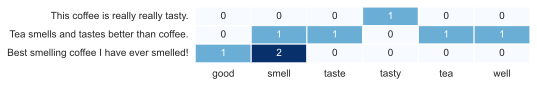

In [39]:
plt.figure(figsize=(6, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

In [40]:
cv = CountVectorizer(ngram_range=(2, 2),  # use (1, 2) for unigrams *and* bigrams
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())

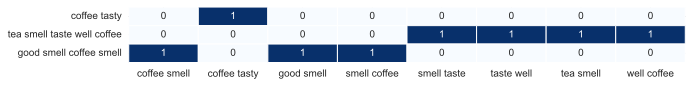

In [41]:
plt.figure(figsize=(10, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

Now these vectors are a bit more meaningful. Notice, in a way, bigrams are a contrived way to capture context in textual data.

### TFIDF Vectorizer

Downsides of Count Vectorizer:

- Counts can be too simplistic
- High counts can dominate, especially for high frequency words or long documents
- Each word is treated equally, when some terms might be more "important" than others

We define TFIDF as:

$$
\text{TF-IDF} = \text{term frequency} * \text{inverse document frequency}
$$

where:

$$
\begin{align*}
\text{term frequency} &= \frac{\text{term count in document}}{\text{total terms in document}} \\[8pt]
\text{inverse document frequency} &= \log\bigg(\frac{\text{total number of documents} + 1}{\text{number of documents with term} + 1}\bigg)
\end{align*}
$$

This measure is calculated for every term-document combination:

- The **term frequency** measures the "density" of a word in a document
- The **inverse document frequency** (without the $\log$) measures the size of the corpus *in terms of* the number of documents containing the term. E.g., if IDF=5 then the corpus is 5 times the size of the "sub-corpus" of documents containing the term. The $\log$ dampens the effect of the inverse document frequency as the denominator gets very small or the numerator gets very large.

So, we can think of TF as the "main" measure, and IDF as the "scaling" factor:

- Very common words across all documents will get a lower score.
- Rare words considering all documents get a higher score.

In [42]:
cv = TfidfVectorizer(max_df=1.0,
                     min_df=1,
                     max_features=None)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())

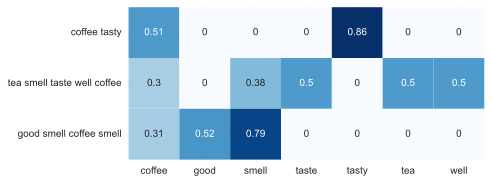

In [43]:
sns.heatmap(df, square=True, cmap='Blues', annot=True, cbar=False);

## Topic Modeling

### Matrix Decomposition

The document term matrix $X$ is a matrix just like any other in Linear Algebra. Just so, it defines a row space (the documents represented as linear combinations of terms), and column space (terms represented as a linear combination of documents). With this, there are a few matrix decomposition methods we can use to extract further information about these documents and terms.

In [44]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA

### Singular Value Decomposition

Singular Value Decomposition is a guaranteed decomposition for any rectangular matrix. It creates the following equality:

$$
X = U\Sigma V^\top
$$

**Breifly**:
- Each row of $U$ represents the corresponding document in terms of "topics directions" along the columns.
- The rows of $V$ (columns of $V^\top$) represent similarly represented version of the terms.
- The $\Sigma$ matrix contains the "variance explained" by each of these topics, sorted in descending order.

As far as naming goes:

- The analysis of these resulting matrices is called **Principal Components Analysis (PCA)**.
- When used with text data, this analysis is called **Latent Semantic Analysis (LSA)**.

In [45]:
# we need a list/array of strings to vectorize
corpus = df_coffee['spacy_doc'].apply(tokenizer, args={'join_tokens':True})

In [46]:
corpus.shape

(2092,)

In [47]:
cv = TfidfVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)
# df = pd.DataFrame(X, index=corpus, columns=cv.get_feature_names_out())

In [48]:
X.shape

(2092, 65)

Note, we use `TruncatedSVD` here because it's a more efficient implementation of SVD. PCA centers the data before running the algorithm, which is more "appropriate" but takes more time. This does cause a few inconsistencies in the "sorted" $\Sigma$.

In [49]:
lsa = TruncatedSVD(n_components=5)  # results only change for larger (unseen) values

doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00488089, 0.08197357, 0.04778102, 0.04677998, 0.03500972])

In [50]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [51]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Sweetly floral and delicately cocoa-toned. Honeysuckle, cocoa nib, Concord grape, agave, lemon-thyme in aroma and cup. High-toned structure with juicy, confident acidity; buoyant, lively, viscous mouthfeel. Honeysuckle and cocoa nib characterize the sweet finish. 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Viscous, creamy mouthfeel; chocolaty, slightly smoky finish. In three parts milk, floral and chocolate notes preside.  

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bitte

In [52]:
topic_term = pd.DataFrame(lsa.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.192,0.124,0.090,0.103,0.117,0.072,0.068,0.167,0.082,0.256,...,0.280,0.146,0.079,0.144,0.195,0.249,0.077,0.070,0.066,0.148
1,0.072,-0.025,-0.142,0.065,0.120,-0.019,-0.019,-0.107,-0.003,-0.461,...,0.034,0.029,0.041,0.038,0.113,0.032,-0.016,-0.046,0.070,0.040
2,0.039,0.067,0.296,-0.043,-0.123,0.196,0.061,0.143,-0.008,-0.072,...,0.099,-0.061,0.057,-0.147,-0.107,0.110,0.059,0.124,-0.090,0.022
3,-0.121,0.005,-0.108,-0.008,0.008,-0.089,0.030,0.065,-0.011,-0.026,...,-0.175,-0.037,-0.047,-0.041,0.032,0.096,0.004,-0.017,-0.015,0.007
4,-0.085,-0.168,-0.119,0.011,-0.167,-0.032,-0.082,-0.070,-0.056,-0.073,...,0.083,-0.148,-0.061,0.045,-0.372,-0.069,0.030,0.016,-0.049,-0.065


In [53]:
# the third "topic"
topic = 2
n_terms = 10

topic_term.T[topic].abs().sort_values(ascending=False).iloc[:n_terms]

bake          0.296
sandalwood    0.266
dark          0.252
nut           0.237
flavor        0.216
savory        0.216
juicy         0.205
cut           0.203
hazelnut      0.197
brisk         0.196
Name: 2, dtype: float64

### Non-Negative Matrix Factorization

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is very similar to SVD. Here, we have the following decomposition.

$$
X = WH
$$

In this case though, all values in $W$ and $H$ are positive, and we can *approximate* this decomposition because all values in $X$ are positive.

In [54]:
nmf = NMF(4)  # here, the number will change the results
doc_topic = nmf.fit_transform(X)

In [55]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [56]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bittersweet and chocolaty in the finish. Chocolate and flowers dominate in three parts milk.  

Evaluated as espresso. Deeply chocolaty, balanced, roast-rounded. Dark chocolate, nectarine, molasses, gently scorched cedar, rhododendron in aroma and small cup. Full, satiny mouthfeel; crisp, chocolaty finish. In three parts milk the dark chocolate notes are amplified, as are the florals 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Vis

In [57]:
topic_term = pd.DataFrame(nmf.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.933,0.391,0.000,0.612,0.863,0.000,0.083,0.022,0.351,0.805,...,1.422,0.898,0.233,1.220,0.997,0.601,0.091,0.000,0.556,0.650
1,0.000,0.173,0.000,0.047,0.000,0.000,0.133,0.603,0.114,1.579,...,0.029,0.135,0.000,0.174,0.178,0.398,0.179,0.118,0.000,0.136
2,0.547,0.485,0.962,0.104,0.000,0.611,0.301,0.660,0.210,0.709,...,0.897,0.238,0.294,0.032,0.199,0.702,0.276,0.438,0.000,0.353
3,0.492,0.163,0.000,0.363,0.487,0.017,0.112,0.284,0.167,0.000,...,0.503,0.334,0.230,0.308,0.706,0.738,0.192,0.048,0.261,0.377


In [58]:
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

savory        2.345
sweet         1.422
long          1.284
flavor        1.231
syrupy        1.220
juicy         1.121
sandalwood    1.120
structure     1.107
resonant      1.048
richly        1.022
Name: 0, dtype: float64

In [59]:
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    1.579
dark         1.305
milk         1.131
espresso     1.127
evaluate     1.099
small        1.097
chocolaty    1.015
cedar        0.603
fruit        0.521
floral       0.493
Name: 1, dtype: float64

As you can tell, this often produces more agreeable results than LSA.

### Latent Dirichlet Allocation (LDA)

[LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) is a "generative" model that builds topics with the assumption that documents are generated based on a probability distribution of topics, and that topics are just a probability distribution of terms.

In [60]:
from sklearn.decomposition import LatentDirichletAllocation

In [61]:
# these parameters usually require a good bit of tuning ...
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=50)

X_topics = lda.fit_transform(X)

In [62]:
df_lda = pd.DataFrame(data = X_topics,
                      index = corpus)

In [63]:
topic = 0
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

evaluate espresso deeply chocolaty richly floral chocolate fudge lilac peach fresh cut cedar hazelnut butter aroma small cup crisp satiny smooth mouthfeel deep long resonant finish maintain aroma flavor note cup profoundly satisfy part milk chocolate floral slow dance fruit return surface long finish 

evaluate espresso crisply sweet richly floral tone lavender dark chocolate red currant almond butter pink grapefruit zest aroma small cup delicate viscous mouthfeel richly dry finish center note tart fruit dark chocolate bittersweet lavender like flower chocolaty floral part milk ongoing tart fruit note 

evaluate espresso crisply sweet fruit tone pomegranate bake chocolate freesia like flower fresh cut fir orange zest aroma small cup syrupy smooth mouthfeel deeply sweet floral- citrus tone finish part milk crisp chocolate note amplify support pomegranate fir 



In [64]:
topic = 1
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

deeply sweet richly nut tone hazelnut butter magnolia like flower crisp pear cedar agave syrup aroma cup sweet structure gentle round acidity syrupy smooth mouthfeel finish consolidate deep nut rich aromatic wood 

crisply sweet fruit tone raspberry fresh cut fir maple syrup cocoa powder freesia like flower aroma cup sweet structure brisk acidity satiny smooth mouthfeel gently dry finish center quiet note raspberry fir 

richly sweet tart deeply berry tone fresh blueberry rhododendron meyer lemon zest dark chocolate fresh cut oak aroma cup sweet tone structure gentle round acidity syrupy smooth mouthfeel finish consolidate note blueberry dark chocolate oak undertone 



In [65]:
df_lda_terms = pd.DataFrame(data = lda.components_,
                            columns = cv.get_feature_names_out())

In [66]:
topic = 0
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

milk         74.434844
espresso     69.641009
small        69.545450
evaluate     67.766474
chocolate    57.699093
chocolaty    38.829709
dark         34.190979
tone         27.730777
cedar        27.724199
floral       27.440164
Name: 0, dtype: float64

In [67]:
topic = 1
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

bake         91.767614
sweet        90.524695
chocolate    81.982033
fresh        72.833424
hazelnut     72.474163
tone         71.630246
cut          66.920104
oak          65.497078
acidity      60.656499
structure    60.207340
Name: 1, dtype: float64

### Anchored Correlation Explanation (CorEx)

[CorEx](https://github.com/gregversteeg/corex_topic) is a discriminative model, which starts from $X$ (documents/words) to determine $Y$ (topics). CorEx looks for groups of words that are in the same topic, a.k.a. have high Total Correlation (TC), or convey the same information.

- If words are **tightly related** (always appear together in the same topic/document), TC will be high. This is a good topic.
- If the words are all **independent** (never appear together in the same document or topic), TC = 0. This is a bad topic.
- CorEx creates a partition across terms. I.e., **terms can only occur in a single topic**.

CorEx roughly follows this algorithm:
1. Look for a group of words that are both as broad (in many documents) and overlapping as possible (both together will lead to high TC), and call this a topic.
2. Repeat the process for another set of words (not overlapping with your previous group) with as high a TC as possible, and call this the next topic.

As we create more topics, each subsequent topic will have lower TC.

In [68]:
from corextopic import corextopic as ct

In [69]:
# CorEx requires count data
cv = CountVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)

In [70]:
topic_model = ct.Corex(n_hidden=5,                        # number of topics
                       words=cv.get_feature_names_out(),  # list of terms in corpus
                       seed=1)

doc_topic = topic_model.fit_transform(X, words=cv.get_feature_names_out(), docs=corpus)

In [78]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()

for n, topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f"{n}: " + ','.join(topic_words))

0: espresso,evaluate,small,milk,structure,acidity,consolidate,floral,syrup,crisp
1: chocolate,dark,nib,cocoa,chocolaty,bake,delicate,lemon,deep,zest
2: juicy,cut,gentle,bright,fresh,sandalwood,brisk,tart,high,nut
3: short,long,lead,undertone,rich,center,almond
4: sweet,sweetly,savory,deeply,fruit,smooth


Take a look at how you can use [anchor words](https://github.com/gregversteeg/corex_topic/tree/master#using-anchor-words) to guide the topic creation.

## ScatterText

Scattertext is great for
- Visually inspecting text
- Comparing/Contrasting corpora
- And more...

Check out Jason Kessler's GitHub project for more information: [here](https://github.com/JasonKessler/scattertext).

In [79]:
import scattertext as st

In [80]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [81]:
convention_df.head()

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [82]:
corpus = st.CorpusFromPandas(convention_df,
                             category_col='party',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [83]:
html = st.produce_scattertext_explorer(
        corpus,
        category='democrat',
        category_name='Democratic',
        not_category_name='Republican',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=convention_df['speaker'],
        )

In [84]:
with open('demo.html', 'wb') as f:
    f.write(html.encode('utf-8'))

## Sentiment Analysis with VADER

According to the documentation:

    VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. [...]
    
    Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [86]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             # "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled, ignored for seaborn plot below
             "Not bad at all"  # Capitalized negation
             ]

In [87]:
df_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    df_sentiment.append(vs)

In [88]:
df_sentiment = pd.DataFrame(df_sentiment,
                            index = sentences)

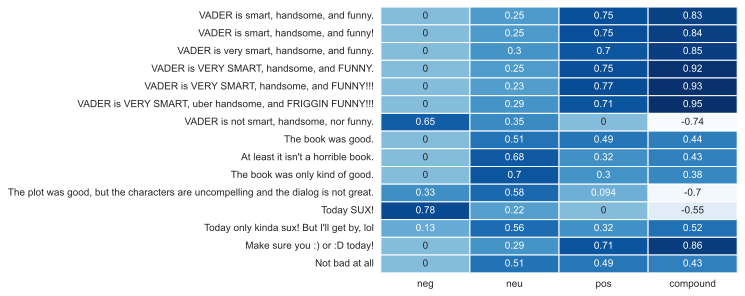

In [89]:
sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

# EXERCISES

## Exercise 1

Using a book from [Project Gutenberg](https://www.gutenberg.org/), get the text data directly from its URL using the `requests` package. Break the book into 50 or more sensible "chunks" like chapters or paragraphs, organizing them into a list.

Load this data into a spaCy pipeline and analyze either Named Entities or Parts of Speech in each chunk.

Provide your analysis: What types of entities or parts of speech are common, and what are uncommon? What insights can you draw from these patterns?

*Note*: Do not download any file, make use of URL in your code.

In [100]:
import requests
import spacy

nlp = spacy.load("en_core_web_sm")

def split_text_into_chunks(url, chunk_size=50):
    response = requests.get(url)
    text = response.text

    doc = nlp(text)
    words = [token.text for token in doc if token.is_alpha]  

    chunks = []
    start_index = 0
    while start_index < len(words):
        end_index = min(start_index + chunk_size, len(words))
        chunks.append(" ".join(words[start_index:end_index]))
        start_index = end_index

    return chunks

book_url = "https://www.gutenberg.org/cache/epub/73201/pg73201.txt"

book_chunks = split_text_into_chunks(book_url)

for i, chunk in enumerate(book_chunks):
    print(f"Chunk {i+1}:")
    doc = nlp(chunk)

    print("{:<20} {:<10}".format("Token", "POS Tag"))
    print("-" * 30)
    for token in doc:
        print("{:<20} {:<10}".format(token.text, token.pos_))
    
    print("\n---\n")


Chunk 1:
Token                POS Tag   
------------------------------
Project              PROPN     
Gutenberg            PROPN     
eBook                PROPN     
of                   ADP       
An                   DET       
altruist             NOUN      
This                 DET       
ebook                NOUN      
is                   AUX       
for                  ADP       
the                  DET       
use                  NOUN      
of                   ADP       
anyone               PRON      
anywhere             ADV       
in                   ADP       
the                  DET       
United               PROPN     
States               PROPN     
and                  CCONJ     
most                 ADJ       
other                ADJ       
parts                NOUN      
of                   ADP       
the                  DET       
world                NOUN      
at                   ADP       
no                   DET       
cost                 NOUN      


Common Entities/Parts of Speech:
Proper Nouns (PROPN): Proper nouns such as "Project Gutenberg," "London," "American Libraries," and various character names like "Wilfrid Bertram" and "Ouida" are quite common. These typically represent specific names of people, places, organizations, or titles.

Nouns (NOUN): Common nouns like "eBook," "publication," "language," "audience," "gentleman," "girl," "critic," and "street" are frequently occurring. These represent general objects, concepts, or entities
.
Adjectives (ADJ): Adjectives such as "goodly," "small," "great," "many," "awfully," and "pretty" are used to describe or modify noun
s.
Verbs (VERB): Various verbs like "copy," "give," "check," "produced," "appear," "says," "get," "drink," "speaking," and "perceives" are commonly found. These depict actions, occurrences, or states.

Uncommon Entities/Parts of Speech:
Prepositions (ADP): Prepositions such as "of," "in," "at," "by," and "with" are quite common in the text but may not stand out as much as nouns, proper nouns, or verbs.

Pronouns (PRON): Pronouns like "it," "you," "he," "his," "she," "us," "we," and "they" are used for referring to specific individuals or things mentioned earlier in the text.

Determiners (DET): Determiners like "the," "a," "an," and "this" are used to specify or clarify nouns.

Conjunctions (CCONJ, SCONJ): Coordinating conjunctions like "and" and subordinating conjunctions like "if," "when," and "though" are present in the text for joining words, phrases, or clauses.


Insights:

When recognising precise names of entities in the text, such as places, organisations, and characters, proper nouns are crucial.
Adjectives and common nouns are frequently employed to characterise ideas, things, and traits.
Verbs describe events or acts, adding to the text's story or descriptn..

Although they offer grammatical and structural support, prepositions, pronouns, determiners, and conjunctions can not have the same semantic weight as nouns, proper nouns, adjectives, or verbs.
While verbs and adjectives indicate narrative or descriptive aspects, the existence of specific entities such as "Project Gutenberg," "eBook," and character names suggests a literary context, probably from a novel or written work.








## Exercise 2

Apply spaCy to extract the most meaningful content from your documents, considering options like excluding stop words or focusing on nouns (i.e. preprocessing and filtering).

Perform a sentiment analysis on the refined data. Create visualization of your result.

Summarize your results by explaining how sentiment changes across sections.

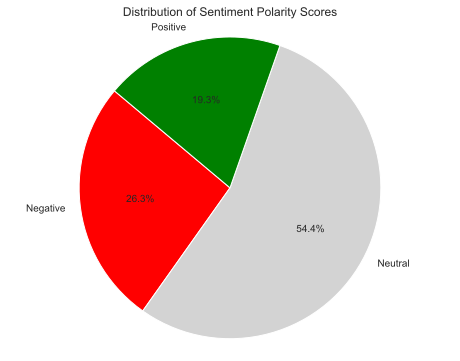

In [106]:
import requests
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Text data from Project Gutenberg URL
book_url = "https://www.gutenberg.org/cache/epub/73137/pg73137.txt" 
response = requests.get(book_url)
text_data = response.text

# Preprocess and filter the text
def preprocess_and_filter(text):
    doc = nlp(text)
    meaningful_tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in STOP_WORDS and token.pos_ in ['NOUN', 'PROPN']]
    return ' '.join(meaningful_tokens)

# Split text into chunks
def split_text_into_chunks(text, chunk_size=500):
    chunks = []
    chunk_start = 0
    while chunk_start < len(text):
        chunk_end = min(chunk_start + chunk_size, len(text))
        chunks.append(text[chunk_start:chunk_end])
        chunk_start = chunk_end
    return chunks

# Preprocess and filter each chunk
def preprocess_chunks(chunks):
    return [preprocess_and_filter(chunk) for chunk in chunks]

# Perform sentiment analysis
def analyze_sentiment(filtered_chunks):
    analyzer = SentimentIntensityAnalyzer()
    return [analyzer.polarity_scores(chunk)['compound'] for chunk in filtered_chunks]

# Visualize sentiment analysis results using a pie chart
def visualize_sentiment(sentiments):
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    sentiment_counts = [len([sentiment for sentiment in sentiments if sentiment < -0.05]),
                        len([sentiment for sentiment in sentiments if -0.05 <= sentiment <= 0.05]),
                        len([sentiment for sentiment in sentiments if sentiment > 0.05])]
    
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'lightgrey', 'green'])
    plt.title('Distribution of Sentiment Polarity Scores')
    plt.axis('equal')
    plt.show()

# Main function
def main():
    chunks = split_text_into_chunks(text_data)
    filtered_chunks = preprocess_chunks(chunks)
    sentiments = analyze_sentiment(filtered_chunks)
    visualize_sentiment(sentiments)

if __name__ == "__main__":
    main()


Indifferent Feeling Dominance: The predominance of neutral mood indicates that a sizable section of the text communicates details or descriptions devoid of strong emotional overtones, either positive or negative. This might point to passages that emphasise general explication, historical context, or factual narrative.

The existence of negative sentiment indicates that there are parts of the text that make the reader feel unhappy or pessimistic. These parts may describe conflict, hardship, or unpleasant events that occur during the story.


Positive Sentiment Representation: While less common than neutral and negative sentiment, positive sentiment suggests parts of the story that probably highlight upbeat or positive characteristics. These passages may contain happy, successful, or upbeat storyline situations.
